In [13]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Same epsilon for the 2 players : Q-learning

## 1- Importation and cleaning

In [14]:
df = pd.read_csv('../final_data/epilon_qlearning.csv')
# Function to convert string to list of two numbers using regular expressions
def extract_numbers(text):
    numbers = re.findall(r'[\d.]+', text)
    return [float(num) for num in numbers]

# Apply the function to the column and convert the strings into lists of two numbers
df['Rewards'] = df['Rewards'].apply(extract_numbers)
df['Prices'] = df['Prices'].apply(extract_numbers)
df['Epsilon'] = df['Epsilon'].apply(extract_numbers)

#Convert into int if digit
df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)

## 2- Learning curves

In [15]:
[df['Rewards'][i][0] for i in df['Unnamed: 0']]

[0.20083569,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,
 0.19161785,

In [16]:
def plot_learning_curve(df, beta):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    num_players = len(df['Mean Rewards'][0])

    for player in range(num_players):
        plt.plot(df['Iteration'], [df['Rewards'][i][player] for i in df['Unnamed: 0']],alpha=0.5, label=f'Player {player + 1}')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()
    
filtred_df = df[~(df['Iteration']=='last 100 iterations mean')][['Iteration','Rewards', 'Prices','beta','Epsilon']]

In [11]:
filtred_df

,Rewards,Prices,beta,Epsilon
0,"[0.20083569, 0.28043792]","[1.619488462572355, 1.463500501627289]",0.002500,"[1.0, 1.0]"
1,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[1.392270716064011, 11.0, 1.392270716064011, 1..."
2,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[1.933577754953025, 22.0, 1.933577754953025, 2..."
3,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[2.6853419319330767, 33.0, 2.6853419319330767,..."
4,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[3.7293878008920602, 44.0, 3.7293878008920602,..."
...,...,...,...,...
190374,"[0.23089762, 0.30318062]","[1.658485452808621, 1.541494482099822]",0.000025,"[7.255792652155376, 109.0, 7.255792652155376, ..."
190375,"[0.1693556, 0.37425087]","[1.853470403989953, 1.541494482099822]",0.000025,"[5.650816999302352, 109.0, 5.650816999302352, ..."
190376,"[0.29202387, 0.36248322]","[1.853470403989953, 1.77547642351742]",0.000025,"[4.400860704049878, 109.0, 4.400860704049878, ..."
190377,"[0.37294167, 0.29794032]","[1.853470403989953, 1.931464384462486]",0.000025,"[3.427393762502219, 109.0, 3.427393762502219, ..."


In [12]:
filtred_df[filtred_df['beta']==0.002500].groupby(by='Iteration')['Rewards'].apply(lambda x: np.mean(x))

NameError: name 'filtred_df' is not defined

## 3- Final rewards and prices as a function of beta

In [24]:
filtred_df = df[df['Iteration']=='last 100 iterations mean'][['Rewards', 'Prices','beta','Epsilon']]

In [31]:
filtred_df['Epsilon'].value_counts()

Epsilon
[0.0, 0.0]                                90
[0.00055311, 0.00055311]                  10
[0.00673812, 0.00673812]                  10
[7.14259613, 218.0, 7.14259613, 218.0]    10
[2.67965175, 33.0, 2.67965175, 33.0]      10
[1.92923694, 22.0, 1.92923694, 22.0]      10
[1.38896974, 11.0, 1.38896974, 11.0]      10
[0.08208603, 0.08208603]                  10
[0.3678813, 0.3678813]                    10
[3.72195524, 44.0, 3.72195524, 44.0]      10
[2.67256289, 109.0, 2.67256289, 109.0]    10
Name: count, dtype: int64

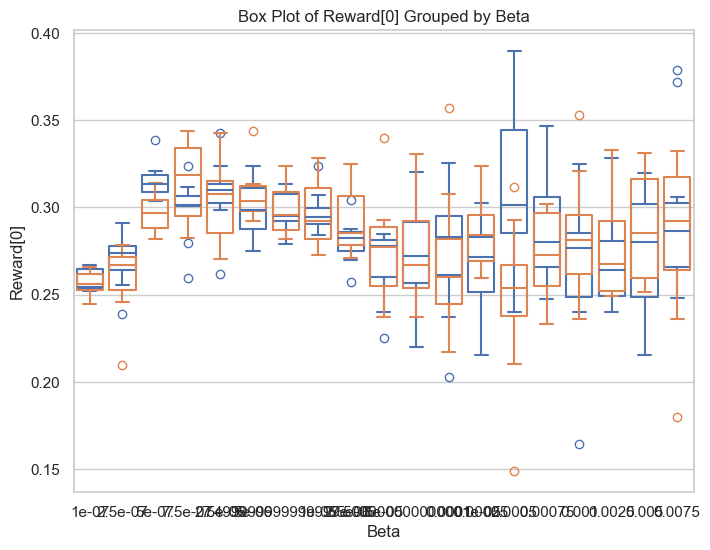

In [33]:
# Create a box plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='beta', y=filtred_df['Rewards'].apply(lambda x: x[0]), data=filtred_df, fill=False)  # Plot the box plot
sns.boxplot(x='beta', y=filtred_df['Rewards'].apply(lambda x: x[1]), data=filtred_df, fill=False)
plt.xlabel('Beta')
plt.ylabel('Reward[0]')
plt.title('Box Plot of Reward[0] Grouped by Beta')
plt.show()

In [32]:
epsilon_qlearn_df['Prices'][0][0]

'['

## Plot Learning Curves

## Plot Rewards as a function of beta

In [20]:
df_final_rewards = epsilon_qlearn_df[epsilon_qlearn_df['Iteration']=='last 100 iterations mean'][['Rewards','beta']]

In [21]:
df_final_rewards

,Rewards,beta
1001,[0.24002856 0.25242936],0.002500
2003,[0.32814274 0.26670753],0.002500
3005,[0.24541585 0.33279624],0.002500
4007,[0.25796301 0.2953014 ],0.002500
5009,[0.28989133 0.2501908 ],0.002500
...,...,...
186371,[0.27647317 0.2766402 ],0.000025
187373,[0.27426902 0.28703427],0.000025
188375,[0.25721757 0.31420438],0.000025
189377,[0.3043459 0.27127401],0.000025


In [29]:
df_final_rewards['Rewards']

'['

In [23]:
import numpy as np

In [13]:
epsilon_qlearn_df[epsilon_qlearn_df['Iteration']=='last 100 iterations mean'].groupby(by='beta')['Rewards']

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [12]:
epsilon_qlearn_df[epsilon_qlearn_df['Iteration']=='last 100 iterations mean'].groupby(by='beta')['Rewards'].mean()

TypeError: agg function failed [how->mean,dtype->object]